In [1]:
import pynini

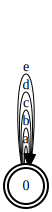

In [9]:
#sigma star is the Kleene closure over the alphabet
sigma_star = pynini.union("a","b","c","d","e").closure().optimize()
sigma_star

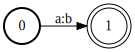

In [11]:
tau = pynini.transducer("a","b")
tau

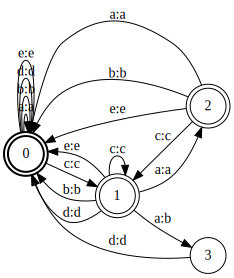

In [15]:
rule = pynini.cdrewrite(tau, "c", "d", sigma_star).optimize()
rule

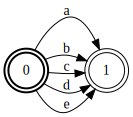

In [18]:
sigma = pynini.union("a","b","c","d","e")
tau = pynini.transducer("a","b")
rule = pynini.cdrewrite(tau, "c", "d", sigma).optimize()
rule

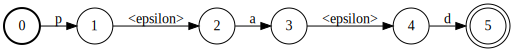

In [21]:
s1 = pynini.acceptor("p")
s2 = pynini.acceptor("a")
s3 = pynini.acceptor("d")

pad = s1+s2+s3
pad

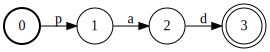

In [22]:
pad.optimize()

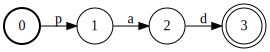

In [23]:
s_ = pynini.acceptor("pad")
s_

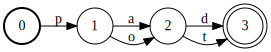

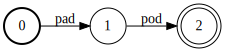

In [32]:
ss = pynini.acceptor("[pad][pod]")
ss

In [35]:
tau=pynini.transducer("a","b")

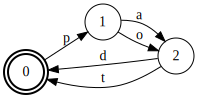

In [39]:
s1 = pynini.acceptor("p")
s2 = pynini.union("a","o")
s3 = pynini.union("d","t")
fsa=s1+s2+s3
fsa=fsa.closure().optimize()
fsa


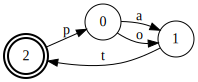

In [40]:
rule=pynini.cdrewrite(tau,"p","d",fsa)
rule

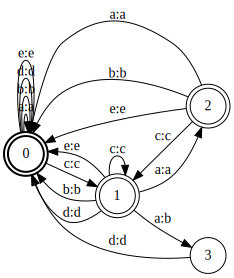

In [43]:
sigma_star = pynini.union("a","b","c","d","e").closure().optimize()
sigma_star
tau=pynini.transducer("a","b")
rule = pynini.cdrewrite(tau, "c", "d", sigma_star).optimize()
rule

In [44]:
#this function takes a string and a rule, and returns the output after applying the rule
def apply(string: str, rule:pynini.Fst):
    return (string @ rule).stringify()

In [53]:
sigma_star = pynini.union("a","b","c","d","e","k").closure().optimize()
tau=pynini.transducer("a","b")
rule = pynini.cdrewrite(tau, "c", "d", sigma_star).optimize()

In [48]:
apply("cab", rule)

'cab'

In [49]:
apply("cad", rule)

'cbd'

In [59]:
import string
string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [66]:
sigma_star = pynini.union(*string.ascii_lowercase).closure().optimize()

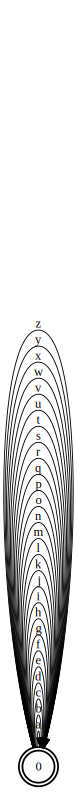

In [67]:
sigma_star

In [72]:
rule_form1=pynini.cdrewrite(pynini.transducer("ise","ize"),"","[EOS]", sigma_star).optimize()

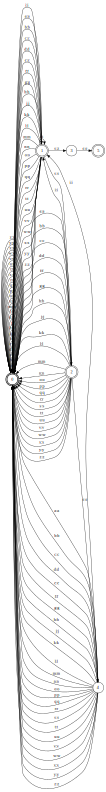

In [73]:
rule_form1

In [74]:
apply("colorise",rule_form1)

'colorize'

In [75]:
apply("rise",rule_form1)

'rize'

In [76]:
rule_form2=pynini.cdrewrite(pynini.transducer("s", "z"), "i", "e", sigma_star).optimize()

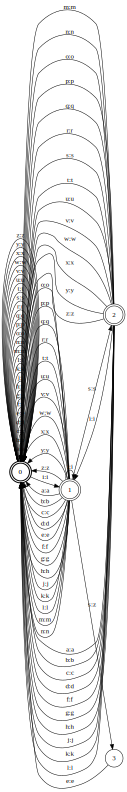

In [77]:
rule_form2

In [78]:
apply("optimiser",rule_form2)

'optimizer'

In [79]:
add_d = pynini.cdrewrite(pynini.transducer ("", "d"),"","[EOS]",sigma_star)